In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
df=pd.read_csv('ErrorAnalysis_ofApproxAdders(CompleteData).csv')
df['ER'] = df['ER'].str.replace('%', '').astype(float)
df

,Design,ER,MED,MRED,NMED (in 10^-3),Power,Delay (in ps),Power-NMED,Energy-NMED,EDP-NMED
0,HOERAA(K=6),99.71,386.63,5.89,5.90,9.450000e-07,298.0,NaN,NaN,NaN
1,HOERAA(K=7),99.41,193.69,5.17,2.96,1.110000e-06,341.0,NaN,NaN,NaN
2,HOERAA(K=8),98.83,96.49,4.45,1.47,1.280000e-06,384.0,NaN,NaN,NaN
3,HOERAA(K=9),97.66,48.16,3.73,0.73,1.440000e-06,428.0,NaN,NaN,NaN
4,HOERAA(K=10),95.31,24.07,2.98,0.37,1.610000e-06,471.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58,OLOCA(K=8),99.12,116.51,4.45,1.78,NaN,NaN,NaN,NaN,NaN
59,OLOCA(K=9),98.83,64.15,3.73,0.98,NaN,NaN,NaN,NaN,NaN
60,OLOCA(K=10),97.66,32.08,2.98,0.49,NaN,NaN,NaN,NaN,NaN
61,OLOCA(K=11),95.31,15.84,2.25,0.24,NaN,NaN,NaN,NaN,NaN


In [83]:
models = range(6, 13)  # Corresponding to K values from 6 to 12
data_types = ["LOA", "LOAWA", "OLOCA", "HOERAA", "ETAI", "CPETA", "ECPETA", "HERLOA"]

# Initialize a dictionary to store data
data = {dtype: [] for dtype in data_types}

# Populate the dictionary with error rates for each model
for dtype in data_types:
    for k in models:
        # Find the design matching the current type and K value
        design_key = f"{dtype}(K={k})"
        error_rate = df.loc[df['Design'] == design_key, 'ER'].values
        data[dtype].append(error_rate[0] if len(error_rate) > 0 else None)
data

{'LOA': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34],
 'LOAWA': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34],
 'OLOCA': [99.51, 99.34, 99.12, 98.83, 97.66, 95.31, 90.63],
 'HOERAA': [99.71, 99.41, 98.83, 97.66, 95.31, 90.63, 81.25],
 'ETAI': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34],
 'CPETA': [92.48, 89.98, 86.63, 82.18, 76.24, 68.34, 57.8],
 'ECPETA': [92.48, 89.98, 86.63, 82.18, 76.24, 68.34, 57.8],
 'HERLOA': [91.25, 88.31, 84.39, 79.22, 72.29, 63.07, 50.77]}

{'LOA': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34], 'LOAWA': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34], 'OLOCA': [99.51, 99.34, 99.12, 98.83, 97.66, 95.31, 90.63], 'HOERAA': [99.71, 99.41, 98.83, 97.66, 95.31, 90.63, 81.25], 'ETAI': [94.34, 92.48, 89.98, 86.63, 82.18, 76.24, 68.34], 'CPETA': [92.48, 89.98, 86.63, 82.18, 76.24, 68.34, 57.8], 'ECPETA': [92.48, 89.98, 86.63, 82.18, 76.24, 68.34, 57.8], 'HERLOA': [91.25, 88.31, 84.39, 79.22, 72.29, 63.07, 50.77]}


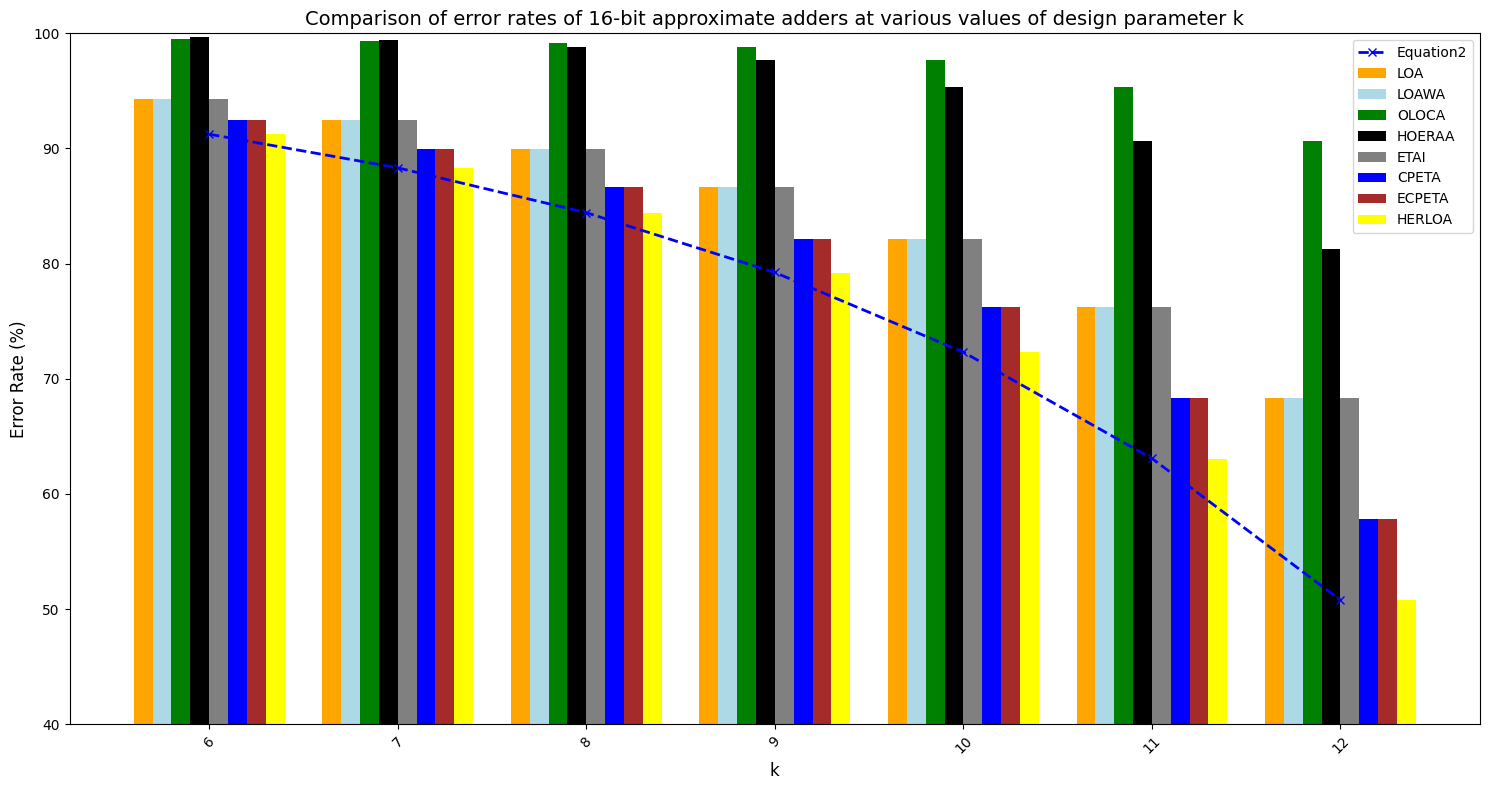

In [84]:
models = range(6, 13)  # Corresponding to K values from 6 to 12
data_types = ["LOA", "LOAWA", "OLOCA", "HOERAA", "ETAI", "CPETA", "ECPETA", "HERLOA"]
eqn=[]

for k in models:
    eqn.append((1-(7/8)*(3/4)**(14-k))*100)

# Initialize a dictionary to store data
data = {dtype: [] for dtype in data_types}

# Populate the dictionary with error rates for each model
for dtype in data_types:
    for k in models:
        # Find the design matching the current type and K value
        design_key = f"{dtype}(K={k})"
        error_rate = df.loc[df['Design'] == design_key, 'ER'].values
        data[dtype].append(error_rate[0] if len(error_rate) > 0 else None)
print(data)
# Plotting
bar_width = 0.1
x_labels = np.arange(len(models))

# Create the bar graph
plt.figure(figsize=(15, 8))
plt.ylim(40,100)

colors = ['orange', 'lightblue', 'green', 'black', 'grey', 'blue', 'brown', 'yellow']

for i, dtype in enumerate(data_types):
    values = [value if value is not None else 0 for value in data[dtype]]
    plt.bar(x_labels + i * bar_width, values, width=bar_width, label=dtype, color=colors[i])

plt.plot(x_labels + bar_width * (len(data_types) - 1) / 2, eqn, color='blue', label='Equation2', marker='x', linestyle='--', linewidth=2)

# Customizations
plt.xticks(x_labels + bar_width * (len(data_types) - 1) / 2, models, rotation=45, fontsize=10)
plt.ylabel("Error Rate (%)", fontsize=12)
plt.xlabel("k", fontsize=12)
plt.title("Comparison of error rates of 16-bit approximate adders at various values of design parameter k", fontsize=14)
plt.legend(title="", fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig("fig6.png", dpi=300)

plt.show()